In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn
import pandas as pd
import sys
import scipy
from IPython.core.display import HTML
HTML("<style>.container { width:85% !important; }</style>")

In [3]:
paths = ['/home/j/jt/jt306/PycharmProjects','/home/j/jt/jt306/PycharmProjects/FeatureSelectionPython278']
for item in paths:
    if item not in sys.path:
        sys.path.insert(0,item)
print(sys.path)
import FeatureSelectionPython278 as pj

['/home/j/jt/jt306/PycharmProjects/FeatureSelectionPython278', '/home/j/jt/jt306/PycharmProjects', '', '/home/j/jt/jt306/caffe/python', '/Volumes/LocalDataHD/j/jt/jt306/Documents/Notebooks', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python35.zip', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5/plat-darwin', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5/lib-dynload', '/home/j/jt/jt306/.local/lib/python3.5/site-packages', '/usr/local/lib/python2.7/site-packages', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5/site-packages', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5/site-packages/Sphinx-1.3.5-py3.5.egg', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5/site-packages/aeosa', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5/site-packages/setuptools-27.2.0-py3.5.egg', '/Volumes/LocalDataHD/j/jt/jt306/anaconda/lib/python3.5/site-packages/IPython/extensions', '/Volumes/LocalDa

## Original settings: 295 TechTC datasets - top 300 features chosen with RFE

In [7]:
from FeatureSelectionPython278 import ProcessNumpyResults as PNR 
e

dsvm = PNR.Setting(295,'dsvm',300,'cross-val',100, 'RFE')
anova_lupi = PNR.Setting(295, 'lupi', 300, 'cross-val', 100, 'anova')
anova_svm = PNR.Setting(295, 'svm', 300, 'cross-val', 100, 'anova')
chi2_lupi = PNR.Setting(295, 'lupi', 300, 'cross-val', 100, 'chi2')
chi2_svm = PNR.Setting(295, 'svm', 300, 'cross-val', 100, 'chi2')
mutinfo_lupi_100 = PNR.Setting(295, 'lupi', 300, 'cross-val', 100, 'mutinfo')
mutinfo_lupi_10 = PNR.Setting(295, 'lupi', 300, 'cross-val', 10, 'mutinfo')
mutinfo_svm = PNR.Setting(295,'svm',300,'cross-val',100,'mutinfo')
svm_deltaplus_wrong = PNR.Setting(295,'dp',300,'wrongparams',100,'RFE')
svm_deltaplus_fixed = PNR.Setting(295,'dp',300,'fixed-delta',100,'RFE')
svm_deltaplus = PNR.Setting(295,'dp',300,'all-cross-val',100,'RFE')
import imp
imp.reload(PNR)

def get_list_attributes(s):   
    attributes = [s.name,s.num_datasets,s.classifier_type,s.n_top_feats,s.percent_of_priv,s.featsel]
    print(attributes)
    if s.featsel == 'RFE':
        s.featsel = ''
    scores = np.round(np.mean(PNR.get_errors(s)),10)
    attributes.append(scores)
    return attributes

(295, 100)


In [8]:
settings = [lufe_baseline, all_baseline, svm_baseline, dsvm, anova_lupi,anova_svm,chi2_lupi,chi2_svm,mutinfo_svm,
            mutinfo_lupi_100,svm_deltaplus_wrong,svm_deltaplus_fixed, svm_deltaplus]
all_data = [get_list_attributes(setting) for setting in settings]
df = pd.DataFrame(all_data)
columns = ['Name','# Datasets','Setting','# Selected','% Privileged Used','Feature Selection','Error rate']
df.columns = t                
df.sort_values(by='Error rate')

['lupi-cross-val-100RFE', 295, 'lupi', 300, 100, 'RFE']
['baseline-cross-val-100RFE', 295, 'baseline', 300, 100, 'RFE']
['svm-cross-val-100RFE', 295, 'svm', 300, 100, 'RFE']
['dsvm-cross-val-100RFE', 295, 'dsvm', 300, 100, 'RFE']
['lupi-cross-val-100anova', 295, 'lupi', 300, 100, 'anova']
['svm-cross-val-100anova', 295, 'svm', 300, 100, 'anova']
['lupi-cross-val-100chi2', 295, 'lupi', 300, 100, 'chi2']
['svm-cross-val-100chi2', 295, 'svm', 300, 100, 'chi2']
['svm-cross-val-100mutinfo', 295, 'svm', 300, 100, 'mutinfo']
['lupi-cross-val-100mutinfo', 295, 'lupi', 300, 100, 'mutinfo']
['dp-wrongparams-100RFE', 295, 'dp', 300, 100, 'RFE']
['dp-fixed-delta-100RFE', 295, 'dp', 300, 100, 'RFE']
['dp-all-cross-val-100RFE', 295, 'dp', 300, 100, 'RFE']


,Name,# Datasets,Setting,# Selected,% Privileged Used,Feature Selection,Error rate
9,lupi-cross-val-100mutinfo,295,lupi,300,100,mutinfo,13.564715
4,lupi-cross-val-100anova,295,lupi,300,100,anova,14.136656
6,lupi-cross-val-100chi2,295,lupi,300,100,chi2,14.145465
0,lupi-cross-val-100RFE,295,lupi,300,100,RFE,15.697238
12,dp-all-cross-val-100RFE,295,dp,300,100,RFE,15.943175
10,dp-wrongparams-100RFE,295,dp,300,100,RFE,16.141971
11,dp-fixed-delta-100RFE,295,dp,300,100,RFE,16.141971
2,svm-cross-val-100RFE,295,svm,300,100,RFE,17.515372
5,svm-cross-val-100anova,295,svm,300,100,anova,18.954896
1,baseline-cross-val-100RFE,295,baseline,300,100,RFE,18.957734


### RFE SVM vs All features SVM - feature selection helps in majority of datasets vs naive, all feature SVM

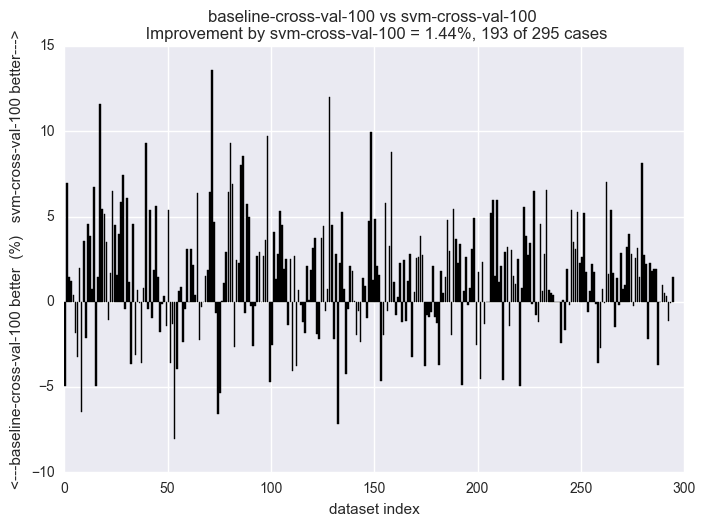

In [133]:
PNR.plot_bars(all_baseline,svm_baseline)

### LUFe vs RFE SVM - using the unselected features further improves performance

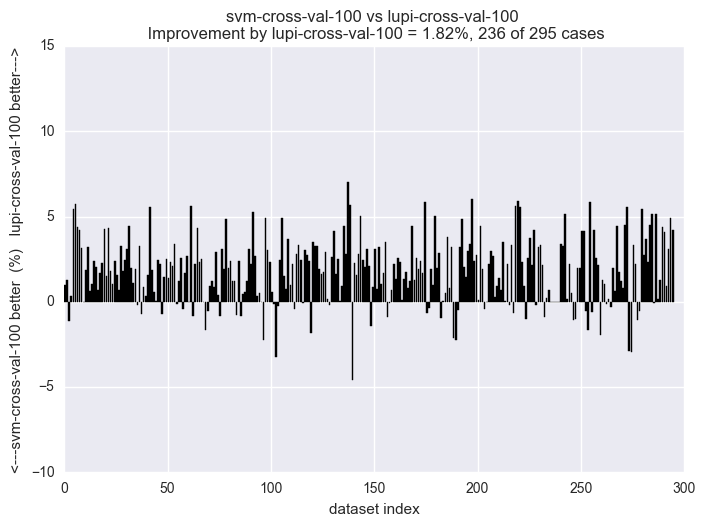

In [134]:
PNR.plot_bars(svm_baseline,lufe_baseline)

### LUFe vs All features SVM- big improvement by LUFe over naive SVM with all features

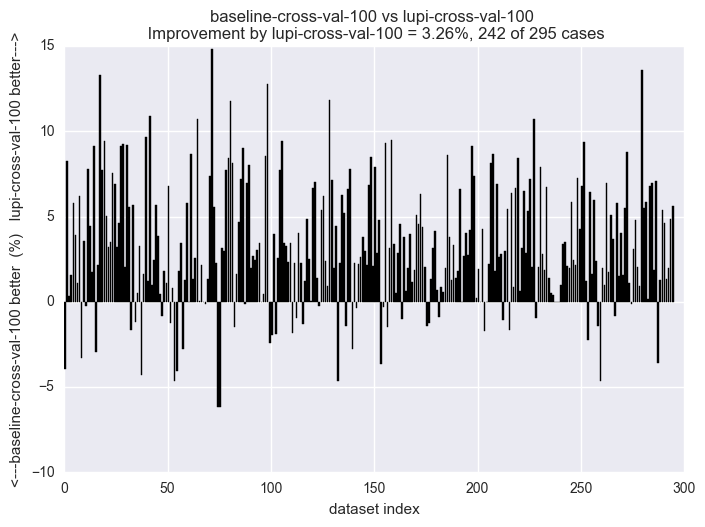

In [135]:
PNR.plot_bars(all_baseline,lufe_baseline)

## Other feature selection methods

### 

,Name,# Datasets,Setting,# Selected,% Privileged Used,Feature Selection,Scores
0,lupi-cross-val-100,295,lupi,300,100,RFE,15.697238
1,baseline-cross-val-100,295,baseline,300,100,RFE,18.957734
2,svm-cross-val-100,295,svm,300,100,RFE,17.515372
3,dsvm-cross-val-100,295,dsvm,300,100,RFE,20.149284


# Other LUPI methods:  50/50  whether SVM+ or SVM delta+ is better

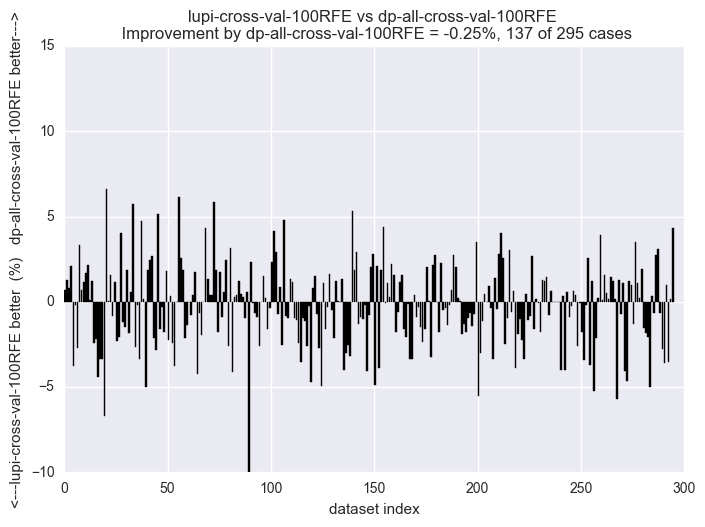

In [12]:
PNR.plot_bars(lufe_baseline,svm_deltaplus)

# Fixing the delta parameter speeds up cross-validation, is veeery slightly worse

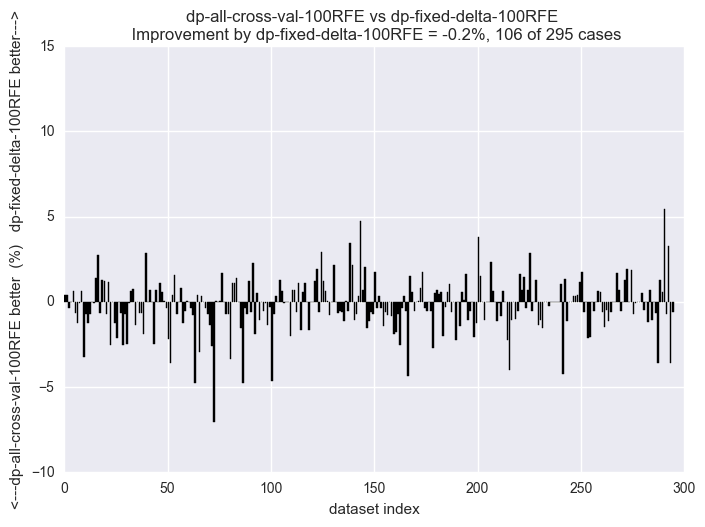

In [13]:
PNR.plot_bars(svm_deltaplus,svm_deltaplus_fixed)

# Comparing SVM delta+ with fixed delta param, with SVM+

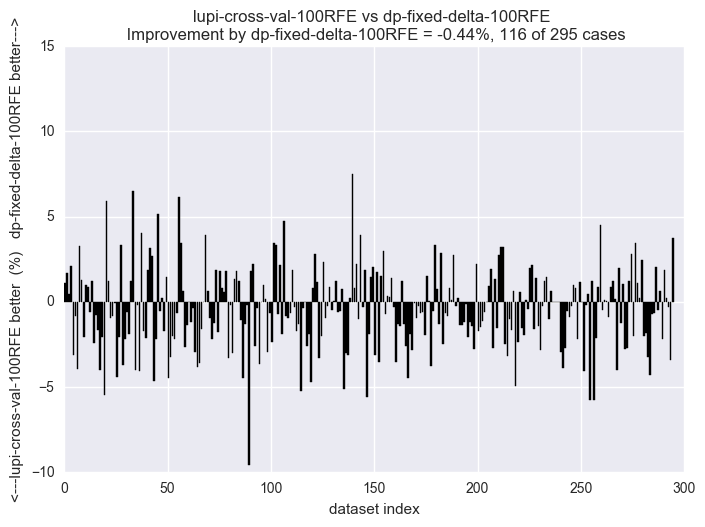

In [15]:
PNR.plot_bars(lufe_baseline,svm_deltaplus_fixed)